In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import datasets, transforms

In [2]:
BATCH_SIZE = 32
NUM_OF_WORKERS = 2
NUM_OF_EPOCHS = 40
NAME_OF_MODEL = "simple_cnn"
EARLY_STOPPING_PATIENCE = 15

trainset = datasets.FashionMNIST('data/', download=True, train=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_OF_WORKERS)
testset = datasets.FashionMNIST('data/', download=True, train=False, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_OF_WORKERS)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)

device: cuda:0


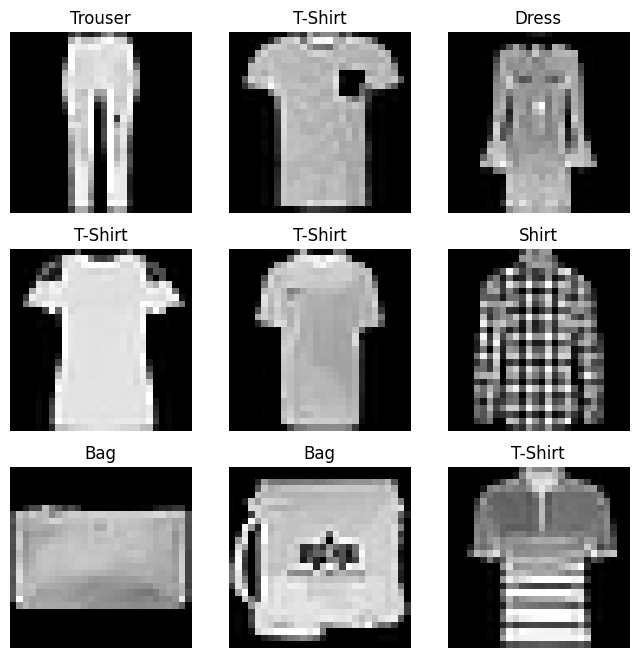

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = GarmentClassifier()

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

In [7]:
batch_sizes = [BATCH_SIZE]

from training_and_evaluate import train_and_eval

batch_tr_info, batch_te_info = train_and_eval(model=model, trainset=trainset, testset=testset, batch_sizes=batch_sizes,
                                              NAME_OF_MODEL=NAME_OF_MODEL, folder_to_save_in="",
                                              NUM_OF_EPOCHS=NUM_OF_EPOCHS,
                                              early_stopping_patience=EARLY_STOPPING_PATIENCE, NUM_OF_WORKERS=NUM_OF_WORKERS)

Device: cuda:0
Epoch 1 Training...


100%|██████████| 1875/1875 [00:11<00:00, 169.13it/s]


Epoch 1 Testing...


100%|██████████| 313/313 [00:03<00:00, 91.51it/s] 


Epoch 1: Train_accuracy: 75.61%, Train_loss: 0.641532, Test_accuracy: 81.58%, Test_loss: 0.511867
Epoch 2 Training...


100%|██████████| 1875/1875 [00:09<00:00, 201.36it/s]


Epoch 2 Testing...


100%|██████████| 313/313 [00:03<00:00, 88.82it/s] 


Epoch 2: Train_accuracy: 84.32%, Train_loss: 0.427769, Test_accuracy: 84.30%, Test_loss: 0.430968
Epoch 3 Training...


100%|██████████| 1875/1875 [00:09<00:00, 205.43it/s]


Epoch 3 Testing...


100%|██████████| 313/313 [00:03<00:00, 93.13it/s] 


Epoch 3: Train_accuracy: 86.55%, Train_loss: 0.368597, Test_accuracy: 86.25%, Test_loss: 0.376449
Epoch 4 Training...


100%|██████████| 1875/1875 [00:09<00:00, 192.62it/s]


Epoch 4 Testing...


100%|██████████| 313/313 [00:04<00:00, 73.87it/s] 


Epoch 4: Train_accuracy: 87.59%, Train_loss: 0.337286, Test_accuracy: 87.31%, Test_loss: 0.350611
Epoch 5 Training...


100%|██████████| 1875/1875 [00:13<00:00, 136.47it/s]


Epoch 5 Testing...


100%|██████████| 313/313 [00:04<00:00, 66.50it/s] 


Epoch 5: Train_accuracy: 88.25%, Train_loss: 0.318426, Test_accuracy: 87.47%, Test_loss: 0.337045
Epoch 6 Training...


100%|██████████| 1875/1875 [00:15<00:00, 122.27it/s]


Epoch 6 Testing...


100%|██████████| 313/313 [00:04<00:00, 75.54it/s] 


Epoch 6: Train_accuracy: 88.96%, Train_loss: 0.298570, Test_accuracy: 88.22%, Test_loss: 0.329715
Epoch 7 Training...


100%|██████████| 1875/1875 [00:13<00:00, 134.87it/s]


Epoch 7 Testing...


100%|██████████| 313/313 [00:04<00:00, 68.10it/s] 


Epoch 7: Train_accuracy: 89.37%, Train_loss: 0.285561, Test_accuracy: 87.89%, Test_loss: 0.333564
Epoch 8 Training...


100%|██████████| 1875/1875 [00:13<00:00, 143.14it/s]


Epoch 8 Testing...


100%|██████████| 313/313 [00:04<00:00, 64.21it/s] 


Epoch 8: Train_accuracy: 89.85%, Train_loss: 0.271037, Test_accuracy: 87.84%, Test_loss: 0.333796
Epoch 9 Training...


100%|██████████| 1875/1875 [00:11<00:00, 163.22it/s]


Epoch 9 Testing...


100%|██████████| 313/313 [00:03<00:00, 78.57it/s] 


Epoch 9: Train_accuracy: 90.23%, Train_loss: 0.259553, Test_accuracy: 88.73%, Test_loss: 0.312996
Epoch 10 Training...


100%|██████████| 1875/1875 [00:12<00:00, 155.93it/s]


Epoch 10 Testing...


100%|██████████| 313/313 [00:04<00:00, 73.55it/s] 


Epoch 10: Train_accuracy: 90.60%, Train_loss: 0.250742, Test_accuracy: 89.07%, Test_loss: 0.304290
Epoch 11 Training...


100%|██████████| 1875/1875 [00:11<00:00, 165.25it/s]


Epoch 11 Testing...


100%|██████████| 313/313 [00:04<00:00, 78.17it/s] 


Epoch 11: Train_accuracy: 90.89%, Train_loss: 0.240041, Test_accuracy: 89.34%, Test_loss: 0.304013
Epoch 12 Training...


100%|██████████| 1875/1875 [00:11<00:00, 163.44it/s]


Epoch 12 Testing...


100%|██████████| 313/313 [00:04<00:00, 75.02it/s] 


Epoch 12: Train_accuracy: 91.16%, Train_loss: 0.233670, Test_accuracy: 89.09%, Test_loss: 0.305393
Epoch 13 Training...


100%|██████████| 1875/1875 [00:11<00:00, 168.68it/s]


Epoch 13 Testing...


100%|██████████| 313/313 [00:04<00:00, 72.62it/s] 


Epoch 13: Train_accuracy: 91.47%, Train_loss: 0.224362, Test_accuracy: 88.71%, Test_loss: 0.306515
Epoch 14 Training...


100%|██████████| 1875/1875 [00:11<00:00, 168.64it/s]


Epoch 14 Testing...


100%|██████████| 313/313 [00:04<00:00, 68.80it/s] 


Epoch 14: Train_accuracy: 91.78%, Train_loss: 0.216829, Test_accuracy: 89.19%, Test_loss: 0.299814
Epoch 15 Training...


100%|██████████| 1875/1875 [00:11<00:00, 168.35it/s]


Epoch 15 Testing...


100%|██████████| 313/313 [00:04<00:00, 73.95it/s] 


Epoch 15: Train_accuracy: 91.97%, Train_loss: 0.209882, Test_accuracy: 88.97%, Test_loss: 0.313081
Epoch 16 Training...


100%|██████████| 1875/1875 [00:11<00:00, 168.41it/s]


Epoch 16 Testing...


100%|██████████| 313/313 [00:04<00:00, 75.24it/s] 


Epoch 16: Train_accuracy: 92.39%, Train_loss: 0.201413, Test_accuracy: 89.11%, Test_loss: 0.317814
Epoch 17 Training...


100%|██████████| 1875/1875 [00:11<00:00, 166.46it/s]


Epoch 17 Testing...


100%|██████████| 313/313 [00:04<00:00, 73.96it/s] 


Epoch 17: Train_accuracy: 92.56%, Train_loss: 0.197156, Test_accuracy: 89.65%, Test_loss: 0.305502
Epoch 18 Training...


100%|██████████| 1875/1875 [00:11<00:00, 163.81it/s]


Epoch 18 Testing...


100%|██████████| 313/313 [00:04<00:00, 75.67it/s] 


Epoch 18: Train_accuracy: 92.78%, Train_loss: 0.188846, Test_accuracy: 88.97%, Test_loss: 0.318077
Epoch 19 Training...


100%|██████████| 1875/1875 [00:11<00:00, 165.34it/s]


Epoch 19 Testing...


100%|██████████| 313/313 [00:04<00:00, 74.02it/s] 


Epoch 19: Train_accuracy: 92.94%, Train_loss: 0.182071, Test_accuracy: 88.94%, Test_loss: 0.339398
Epoch 20 Training...


100%|██████████| 1875/1875 [00:11<00:00, 158.00it/s]


Epoch 20 Testing...


100%|██████████| 313/313 [00:04<00:00, 77.72it/s] 


Epoch 20: Train_accuracy: 93.20%, Train_loss: 0.178169, Test_accuracy: 89.03%, Test_loss: 0.345203
Epoch 21 Training...


100%|██████████| 1875/1875 [00:11<00:00, 167.15it/s]


Epoch 21 Testing...


100%|██████████| 313/313 [00:04<00:00, 69.60it/s] 


Epoch 21: Train_accuracy: 93.43%, Train_loss: 0.171899, Test_accuracy: 88.48%, Test_loss: 0.353634
Epoch 22 Training...


100%|██████████| 1875/1875 [00:10<00:00, 173.05it/s]


Epoch 22 Testing...


100%|██████████| 313/313 [00:04<00:00, 72.98it/s] 


Epoch 22: Train_accuracy: 93.53%, Train_loss: 0.167439, Test_accuracy: 89.59%, Test_loss: 0.342533
Epoch 23 Training...


100%|██████████| 1875/1875 [00:11<00:00, 163.91it/s]


Epoch 23 Testing...


100%|██████████| 313/313 [00:04<00:00, 76.48it/s] 


Epoch 23: Train_accuracy: 93.77%, Train_loss: 0.161276, Test_accuracy: 89.04%, Test_loss: 0.354665
Epoch 24 Training...


100%|██████████| 1875/1875 [00:11<00:00, 163.76it/s]


Epoch 24 Testing...


100%|██████████| 313/313 [00:04<00:00, 77.22it/s] 


Epoch 24: Train_accuracy: 94.03%, Train_loss: 0.156816, Test_accuracy: 88.27%, Test_loss: 0.378156
Epoch 25 Training...


100%|██████████| 1875/1875 [00:11<00:00, 162.36it/s]


Epoch 25 Testing...


100%|██████████| 313/313 [00:04<00:00, 67.84it/s] 


Epoch 25: Train_accuracy: 94.14%, Train_loss: 0.152882, Test_accuracy: 88.90%, Test_loss: 0.371598
Epoch 26 Training...


100%|██████████| 1875/1875 [00:12<00:00, 153.25it/s]


Epoch 26 Testing...


100%|██████████| 313/313 [00:04<00:00, 68.71it/s] 


Epoch 26: Train_accuracy: 94.24%, Train_loss: 0.150202, Test_accuracy: 88.61%, Test_loss: 0.379674
Epoch 27 Training...


100%|██████████| 1875/1875 [00:12<00:00, 151.26it/s]


Epoch 27 Testing...


100%|██████████| 313/313 [00:04<00:00, 63.39it/s] 


Epoch 27: Train_accuracy: 94.56%, Train_loss: 0.145808, Test_accuracy: 89.01%, Test_loss: 0.389040
Epoch 28 Training...


100%|██████████| 1875/1875 [00:12<00:00, 154.77it/s]


Epoch 28 Testing...


100%|██████████| 313/313 [00:04<00:00, 72.71it/s] 


Epoch 28: Train_accuracy: 94.60%, Train_loss: 0.140562, Test_accuracy: 89.17%, Test_loss: 0.381007
Epoch 29 Training...


100%|██████████| 1875/1875 [00:13<00:00, 142.00it/s]


Epoch 29 Testing...


100%|██████████| 313/313 [00:04<00:00, 66.73it/s] 

Epoch 29: Train_accuracy: 94.67%, Train_loss: 0.138895, Test_accuracy: 88.70%, Test_loss: 0.418267
Early stopping triggered. No improvement for 15 epochs.


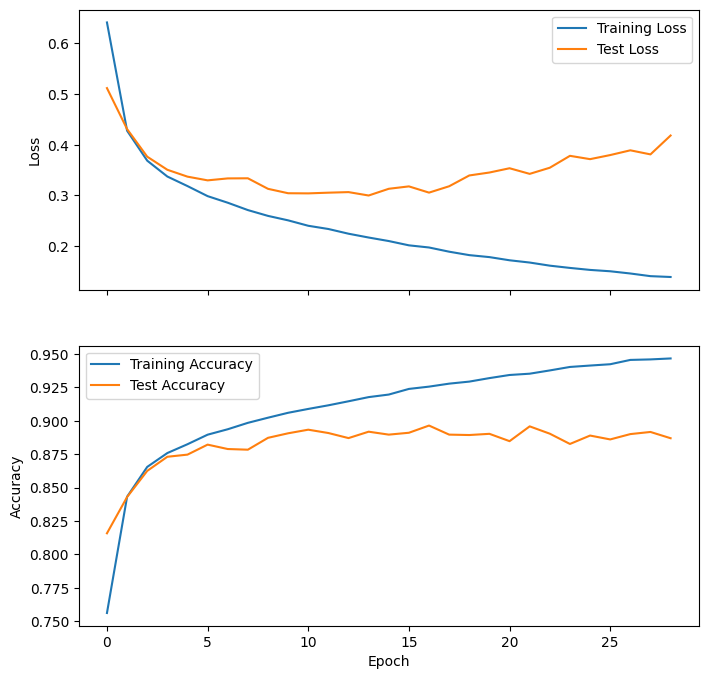

In [8]:
import matplotlib.pyplot as plt

# Create a figure with larger subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))  # Adjust the figsize as needed

# Plot the training and test loss on the first subplot
ax1.plot(batch_tr_info[BATCH_SIZE]["loss"], label="Training Loss")
ax1.plot(batch_te_info[BATCH_SIZE]["loss"], label="Test Loss")
ax1.set_ylabel("Loss")
ax1.legend()

# Plot the training and test accuracy on the second subplot
ax2.plot(batch_tr_info[BATCH_SIZE]["acc"], label="Training Accuracy")
ax2.plot(batch_te_info[BATCH_SIZE]["acc"], label="Test Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

# Show the plot
plt.show()

In [9]:
for batch_size, info in batch_te_info.items():
    best_test_loss = 100
    best_epoch = 0
    for epoch, loss in enumerate(info["loss"]):
        if best_test_loss > loss:
            best_test_loss = loss
            best_epoch = epoch
    print(f"Epoch {best_epoch} has {round(best_test_loss, 3)} loss with {round(info['acc'][best_epoch]*100, 2)}% "
          f"accuracy")

Epoch 13 has 0.3 loss with 89.19% accuracy


### MixUp

In [7]:
model = GarmentClassifier().to(device)

In [8]:
batch_sizes = [BATCH_SIZE]

from training_and_evaluate import train_and_eval

batch_tr_info, batch_te_info = train_and_eval(model=model, trainset=trainset, testset=testset, batch_sizes=batch_sizes,
                                              NAME_OF_MODEL=NAME_OF_MODEL, folder_to_save_in="mixup",
                                              NUM_OF_EPOCHS=NUM_OF_EPOCHS,
                                              early_stopping_patience=EARLY_STOPPING_PATIENCE,
                                              NUM_OF_WORKERS=NUM_OF_WORKERS, mixup=True)

Device: cuda:0
Epoch 1 Training...


  0%|          | 0/1875 [00:04<?, ?it/s]


RuntimeError: The size of tensor a (32) must match the size of tensor b (10) at non-singleton dimension 1

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with larger subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))  # Adjust the figsize as needed

# Plot the training and test loss on the first subplot
ax1.plot(batch_tr_info[BATCH_SIZE]["loss"], label="Training Loss")
ax1.plot(batch_te_info[BATCH_SIZE]["loss"], label="Test Loss")
ax1.set_ylabel("Loss")
ax1.legend()

# Plot the training and test accuracy on the second subplot
ax2.plot(batch_tr_info[BATCH_SIZE]["acc"], label="Training Accuracy")
ax2.plot(batch_te_info[BATCH_SIZE]["acc"], label="Test Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

# Show the plot
plt.show()

In [ ]:
for batch_size, info in batch_te_info.items():
    best_test_loss = 100
    best_epoch = 0
    for epoch, loss in enumerate(info["loss"]):
        if best_test_loss > loss:
            best_test_loss = loss
            best_epoch = epoch
    print(f"Batch size {batch_size}: Epoch {best_epoch} has {round(best_test_loss, 3)} loss with {round(info['acc'][best_epoch]*100, 2)}% accuracy")